## 교통 데이터를 활용한 인구 유동성 분석 및 시각화

원하는 호선의 이름을 입력해주세요 : 안산선


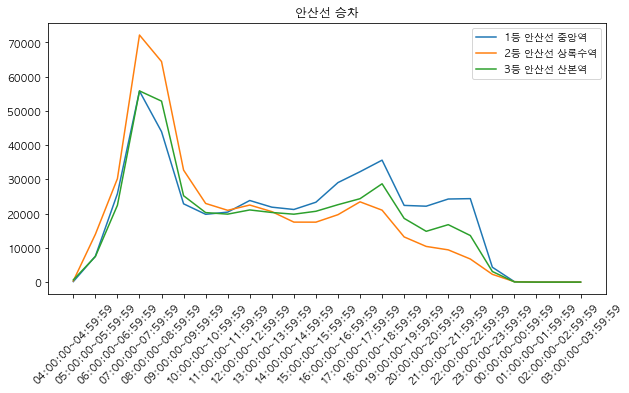

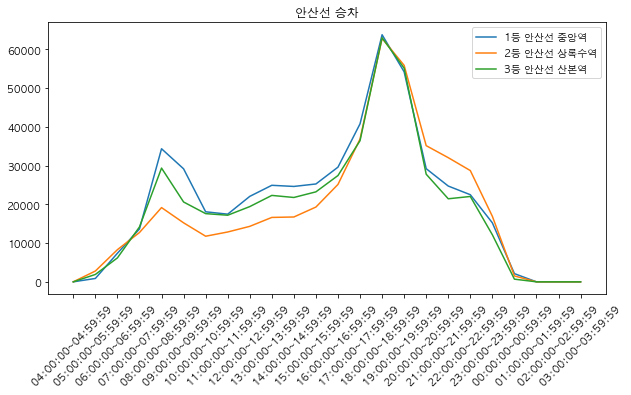

In [5]:
# 출퇴근 시간 유동인구가 많은 역 상위 3개 승/하차 인원시각화 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 데이터 불러오기
df = pd.read_csv('subway_time.csv',encoding='UTF-8',index_col=False)

# 승차 하차 써있는 index 삭제
df.drop(index = 0, inplace=True)

# index 바꾸기
df['Station'] = df[['호선명', '지하철역']].apply(' '.join, axis=1)
df.index = df['Station']

# 필요없는 column 삭제
del df['호선명'], df['지하철역'], df['Station']

# column을 list로 받은 후 이름 변경
col = list(df.columns)
for i in range(len(col)):
    if i % 2 == 1 :
        col[i] = col[i - 1] + ' '

# 변경된 col을 columns에 저장
df.columns = col

# 출퇴근 유동인구 구하고 데이터 추가
df = df.astype(int)
df['출퇴근유동인구'] = df.iloc[:, 6:12].sum(axis=1)
df['출퇴근유동인구'] += df.iloc[:, 26:32].sum(axis=1)

# 원하는 호선 입력 받기
name = input('원하는 호선의 이름을 입력해주세요 :')
a = df.index.str.startswith(name)
data = df[a]

# 해당 호선 유동인구가 많은 역 상위 3개
x = data['출퇴근유동인구'].sort_values()
y = x.loc[::-1].index[:3]

# 순위 정하기
one = x.loc[::-1].index[0]
two = x.loc[::-1].index[1]
three = x.loc[::-1].index[2]

# 출퇴근 유동인구 삭제
del df['출퇴근유동인구']

# 승차 column
dfon = df.iloc[:,range(0,len(df.columns),2)]
# 하차 column
dfoff = df.iloc[:,range(1,len(df.columns),2)]

# MacOS - font 설정
plt.rc('font',family = 'AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 승/하차 인원 시각화
plt.figure(figsize=(10,5))
plt.plot(dfon.loc[y].T)
plt.title(name + " 승차")
plt.legend(['1등 '+ one +'역','2등 '+ two +'역','3등 '+ three +'역'])
plt.xticks(rotation = 45)
plt.show()
plt.figure(figsize=(10,5))
plt.plot(dfoff.loc[y].T)
plt.title(name + " 승차")
plt.legend(['1등 '+ one +'역','2등 '+ two +'역','3등 '+ three +'역'])
plt.xticks(rotation = 45)
plt.show()

원하는 호선의 이름을 입력해주세요 : 4호선


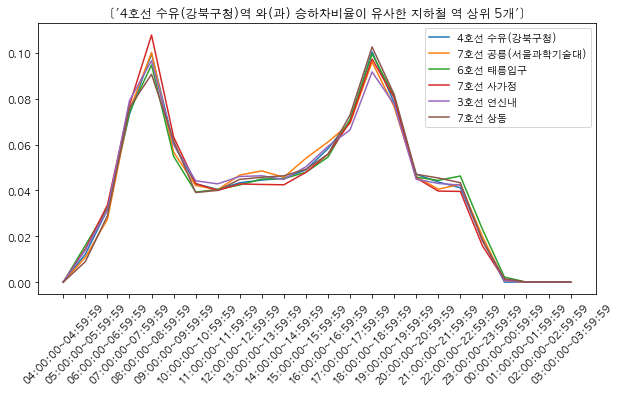

In [6]:
# 입력 받은 해당 호선 출퇴근 시간 유동인구가 가장 많은 역과 시간대별 승/하차 비율이 유사한 역 5개 시각화 #

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 데이터 불러오기
df = pd.read_csv('subway_time.csv',encoding='UTF-8',index_col=False)

# 승차 하차 써있는 index 삭제
df.drop(index = 0, inplace=True)

# index 바꾸기
df['Station'] = df[['호선명', '지하철역']].apply(' '.join, axis=1)
df.index = df['Station']

# 필요없는 column 삭제
del df['호선명'], df['지하철역'], df['Station']

# 출퇴근 유동인구 구하고 데이터 추가
df = df.astype(int)
df['출퇴근유동인구'] = df.iloc[:, 6:12].sum(axis=1)
df['출퇴근유동인구'] += df.iloc[:, 26:32].sum(axis=1)

# 원하는 호선 입력 받기
name = input('원하는 호선의 이름을 입력해주세요 :')
w = df.index.str.startswith(name)
data = df[w]

# 해당 호선 유동인구가 많은 역
a = data['출퇴근유동인구'].sort_values()
b = a.loc[::-1].index[0]

# 출퇴근 유동인구 삭제
del df['출퇴근유동인구']

# 승차 column (승차 + 하차) 저장
for i in range(24):
    df[df.columns[(i * 2)]] += df[df.columns[(i * 2) + 1]]

# 하차 column 삭제
for i in range(24):
    j = (i * 2) + 3
    del df['Unnamed: ' + str(j)]

# 총유동인구 column 추가
df['총유동인구'] = df.sum(axis=1)

# 총유동인구으로 나누기
df = df.div(df['총유동인구'], axis=0)
    
# 총유동인구 삭제
del df['총유동인구']

# 비율이 유사한 역
x = df.sub(df.loc[b],axis=1)
y = np.power(x,2)
z = y.sum(axis=1).sort_values()
s = z.sort_values().index[:6]

# MacOS - font 설정
plt.rc('font',family = 'AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 승/하차 비율이 유사한 역 시각화
plt.figure(figsize=(10,5))
plt.plot(df.loc[s].T)
plt.title("['" + b + "역 와(과) 승하차비율이 유사한 지하철 역 상위 5개']")
plt.legend(s)
plt.xticks(rotation = 45)
plt.show()

원하는 호선의 이름을 입력해주세요 : 1호선


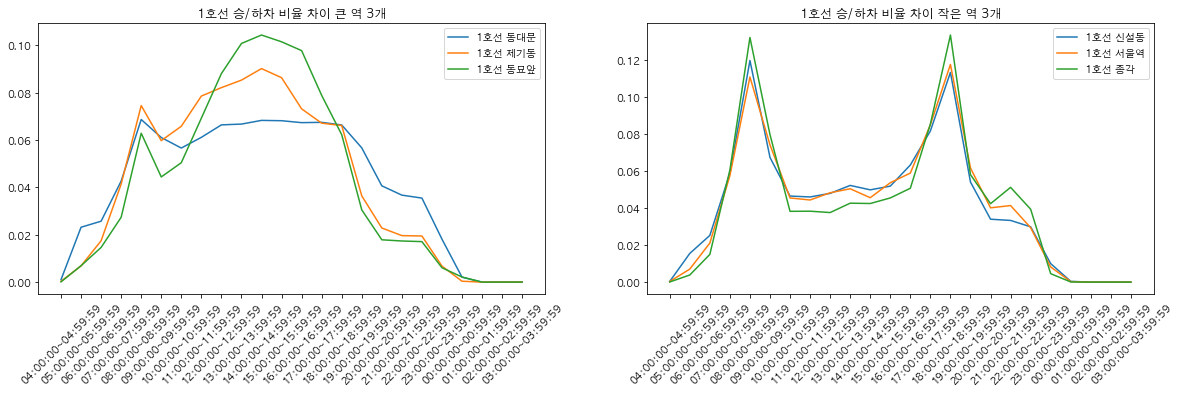

In [7]:
# 입력 받은 해당 호선 출퇴근시간 유동인구와 출퇴근시간 외의 유동인구의 승/하차 비율 차이가 가장 큰 지역과, 크지 않은 지역 각 3개 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 데이터 불러오기
df = pd.read_csv('subway_time.csv',encoding='UTF-8',index_col=False)

# 승차 하차 써있는 index 삭제
df.drop(index = 0, inplace=True)

# index 바꾸기
df['Station'] = df[['호선명', '지하철역']].apply(' '.join, axis=1)
df.index = df['Station']

# 필요없는 column 삭제
del df['호선명'], df['지하철역'], df['Station']

# 정수로 변환
df = df.astype(int)

# 승차 column (승차 + 하차) 저장
for i in range(24):
    df[df.columns[(i * 2)]] += df[df.columns[(i * 2) + 1]]

# 하차 column 삭제
for i in range(24):
    j = (i * 2) + 3
    del df['Unnamed: ' + str(j)]

# 출퇴근 유동인구 구하기
df['출퇴근유동인구'] = df.iloc[:, 3:6].sum(axis=1)
df['출퇴근유동인구'] += df.iloc[:, 13:16].sum(axis=1)

# 출퇴근 외 유동인구 구하기
df['출퇴근외유동인구'] = df.iloc[:,:3].sum(axis=1)
df['출퇴근외유동인구'] += df.iloc[:,6:13].sum(axis=1)
df['출퇴근외유동인구'] += df.iloc[:,16:24].sum(axis=1)

# 총유동인구 column 추가
df['총유동인구'] = df.iloc[:,:24].sum(axis=1)

# 총유동인구으로 나누기
df = df.div(df['총유동인구'], axis=0)

# 총유동인구 삭제
del df['총유동인구']

# 원하는 호선 입력 받기
name = input('원하는 호선의 이름을 입력해주세요 :')
w = df.index.str.startswith(name)
data = df[w]

# 해당 호선 승/하차 비율 차이 구하기
x = data['출퇴근유동인구'] - data['출퇴근외유동인구']
y = np.power(x,2)
small = y.sort_values().index[:3]
big = y.sort_values().index[-3:]

# 필요없는 columns 지우기
del df['출퇴근유동인구'], df['출퇴근외유동인구']

# MacOS - font 설정
plt.rc('font',family = 'AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 승/하자 비율 시각화
fig = plt.figure(figsize=(20,5))
# 가로로 시각화
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
plt.subplot(ax1)
plt.plot(df.loc[big].T)
plt.title(name + " 승/하차 비율 차이 큰 역 3개")
plt.legend(big)
plt.xticks(rotation = 45)
plt.subplot(ax2)
plt.plot(df.loc[small].T)
plt.title(name + " 승/하차 비율 차이 작은 역 3개")
plt.legend(small)
plt.xticks(rotation = 45)
plt.show()